In [12]:
import nfl_data_py as nfl
import pandas as pd
import plotly.express as px
import numpy as np

In [13]:
players = nfl.import_players()

player_qb_data = players[(players['position'] == 'QB') & ((players['rookie_year'] <=2019))].copy()

In [14]:
players[pd.to_datetime(players['birth_date']) == pd.to_datetime(players['birth_date']).min()]

,status,display_name,first_name,last_name,esb_id,gsis_id,birth_date,college_name,position_group,position,...,college_conference,status_description_abbr,status_short_description,gsis_it_id,short_name,smart_id,headshot,suffix,uniform_number,draft_round
10965,DEV,Josh Gable,Josh,Gable,GAB408915,None,1945-08-07,No College,SPEC,K,...,None,None,None,NaN,None,32004741-4240-8915-cd5c-98df08fdce81,https://static.www.nfl.com/image/private/f_aut...,None,None,None


In [15]:
# years = np.linspace(2000, 2024, 24)
# years = [int(i) for i in years]

years = list(iter(range(2000, 2024)))

years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [16]:
weekly_data = nfl.import_weekly_data(years)

Downcasting floats.


In [17]:
weekly_data['week'].unique()

array([ 1, 12, 14, 15,  6, 10,  4,  5,  7,  8,  9, 11, 13,  2, 16, 17,  3,
       18, 19, 21, 20, 22])

In [18]:
weekly_data

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0000003,None,Abdul-Karim al-Jabbar,RB,RB,None,IND,2000,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,-0.2,-0.2
1,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,1,REG,...,0.0,-0.312120,0,0.000000,0.045455,NaN,NaN,0.0,0.3,1.3
2,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,12,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,1.8,1.8
3,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,14,REG,...,1.0,0.609493,0,0.000000,0.071429,NaN,NaN,0.0,4.9,5.9
4,00-0000007,None,Rabih Abdullah,RB,RB,None,TB,2000,15,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,00-0039165,Z.Charbonnet,Zach Charbonnet,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2023,14,REG,...,0.0,-0.787724,0,-0.666667,0.032258,-0.025532,0.030515,0.0,4.8,5.8
5649,00-0039165,Z.Charbonnet,Zach Charbonnet,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2023,15,REG,...,0.0,-0.442067,0,0.000000,0.031250,0.012658,0.055736,0.0,1.6,1.6
5650,00-0039165,Z.Charbonnet,Zach Charbonnet,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2023,16,REG,...,0.0,-1.961893,0,0.307692,0.055556,-0.056034,0.044109,0.0,-0.4,0.6
5651,00-0039165,Z.Charbonnet,Zach Charbonnet,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2023,17,REG,...,2.0,1.644468,0,3.000000,0.151515,0.057778,0.267717,0.0,4.1,9.1


In [19]:
weekly_data.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

In [20]:
player_qb_data.rename(columns={'display_name':'player_display_name'}, inplace=True)

In [21]:
qb_data = weekly_data[weekly_data['position'] == 'QB']

qb_data['player_display_name'].unique()

array(['Troy Aikman', 'Tony Banks', 'Charlie Batch', 'Steve Beuerlein',
       'Michael Bishop', 'Jeff Blake', 'Drew Bledsoe', 'Bubby Brister',
       'Aaron Brooks', 'Dave Brown', 'Mark Brunell', 'Stoney Case',
       'Chris Chandler', 'Kerry Collins', 'Tim Couch', 'Dameyune Craig',
       'Daunte Culpepper', 'Randall Cunningham', 'Koy Detmer',
       'Trent Dilfer', 'Brett Favre', 'Jay Fiedler', 'Doug Flutie',
       'Gus Frerotte', 'John Friesz', 'Rich Gannon', 'Jeff Garcia',
       'Jason Garrett', 'Jeff George', 'Kent Graham', 'Elvis Grbac',
       'Trent Green', 'Chris Greisen', 'Brian Griese', 'Jim Harbaugh',
       'Mark Hartsell', 'Matt Hasselbeck', 'Bobby Hoying', 'Brock Huard',
       'Damon Huard', 'Brad Johnson', 'Rob Johnson', 'Danny Kanell',
       'Shaun King', 'Jon Kitna', 'Ryan Leaf', 'Jeff Lewis', 'Ray Lucas',
       'Peyton Manning', 'Jamie Martin', 'Shane Matthews',
       'Donovan McNabb', 'Steve McNair', 'Cade McNown', 'Jim Miller',
       'Rick Mirer', 'Scott Mi

In [22]:
qb_data = qb_data.merge(player_qb_data, on=['player_display_name'], how='inner')

In [23]:
top_ten_fantasy_qbs = qb_data[['player_display_name', 'fantasy_points_ppr']].groupby(['player_display_name']).sum(['fantasy_points_ppr']).reset_index().sort_values(by =['fantasy_points_ppr'], ascending = False).head(10)

top_ten_fantasy_qbs

,player_display_name,fantasy_points_ppr
131,Tom Brady,6805.740234
45,Drew Brees,5527.359863
1,Aaron Rodgers,5011.439941
110,Peyton Manning,4628.279785
8,Ben Roethlisberger,4390.399902
95,Matt Ryan,4010.260010
111,Philip Rivers,3991.060059
113,Russell Wilson,3842.060059
98,Matthew Stafford,3660.780029
51,Eli Manning,3424.840088


In [24]:
top_ten_qbs_data = qb_data.merge(top_ten_fantasy_qbs, on=['player_display_name'], how='inner')

In [25]:
pd.set_option('display.max_columns', None)
top_ten_qbs_data.columns

Index(['player_id', 'player_name', 'player_display_name', 'position_x',
       'position_group_x', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_po

In [26]:
top_ten_qbs_data = top_ten_qbs_data.sort_values(by=['player_name']).reset_index(drop=True)

names = top_ten_qbs_data[['player_id', 'player_name', 'player_display_name']]
names

,player_id,player_name,player_display_name
0,00-0023459,A.Rodgers,Aaron Rodgers
1,00-0023459,A.Rodgers,Aaron Rodgers
2,00-0023459,A.Rodgers,Aaron Rodgers
3,00-0023459,A.Rodgers,Aaron Rodgers
4,00-0023459,A.Rodgers,Aaron Rodgers
...,...,...,...
2633,00-0010346,None,Peyton Manning
2634,00-0010346,None,Peyton Manning
2635,00-0010346,None,Peyton Manning
2636,00-0010346,None,Peyton Manning


In [27]:
stat_subset = top_ten_qbs_data[['completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs',
       'passing_2pt_conversions','fantasy_points']]

In [28]:
stat_subset.isnull().sum()

completions                  0
attempts                     0
passing_yards                0
passing_tds                  0
interceptions                0
sacks                        0
sack_yards                   0
sack_fumbles                 0
sack_fumbles_lost            0
passing_air_yards            0
passing_yards_after_catch    0
passing_first_downs          0
passing_2pt_conversions      0
fantasy_points               0
dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



In [32]:
scaler = StandardScaler()

scaler.fit(stat_subset)

StandardScaler()

In [33]:
print(scaler.mean_)

[2.25708870e+01 3.49158453e+01 2.62440485e+02 1.81993935e+00
 7.82789992e-01 1.93290371e+00 1.27941622e+01 3.03260045e-01
 1.39499621e-01 2.58469674e+02 1.05933283e+02 1.28476118e+01
 5.57240334e-02 1.71600531e+01]


In [34]:
# Do they have the same amount of columns
len(stat_subset.columns) == len(scaler.mean_)

True

In [35]:
scaled_data = scaler.transform(stat_subset)

In [36]:
scaled_data_with_columns = pd.DataFrame(scaled_data, columns=stat_subset.columns, index=stat_subset.index)

In [37]:
scaled_data_with_columns

,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_2pt_conversions,fantasy_points
0,0.674945,0.009033,0.620552,0.958146,-0.827167,0.042597,0.280610,-0.538899,-0.370160,0.529425,0.205535,0.274212,-0.231529,0.941980
1,0.065392,-0.205645,0.144741,-0.665747,-0.827167,0.677458,0.980858,-0.538899,-0.370160,-0.108614,0.989062,0.750114,-0.231529,-0.126959
2,0.827333,0.545729,1.284184,1.770093,-0.827167,1.947179,1.681106,1.238121,2.283323,0.274209,1.857755,1.226016,-0.231529,1.452328
3,0.674945,0.331051,0.996193,0.958146,-0.827167,-0.592264,-0.419638,-0.538899,-0.370160,0.649527,1.397859,1.226016,-0.231529,1.982989
4,0.065392,0.116372,0.357604,0.958146,-0.827167,0.677458,0.018017,-0.538899,-0.370160,0.461868,-0.032930,0.274212,-0.231529,0.987683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,-2.677597,-1.601054,-2.847862,-1.477694,3.399596,0.042597,-0.332107,1.238121,-0.370160,0.236678,-1.395586,-2.819151,-0.231529,-3.016394
2634,-2.677597,-2.781785,-2.422136,-1.477694,-0.827167,-0.592264,-1.119886,-0.538899,-0.370160,-0.889275,-1.531851,-2.105298,-0.231529,-1.853511
2635,-0.239385,0.223711,-0.506370,-1.477694,-0.827167,-0.592264,-0.507169,-0.538899,-0.370160,0.574463,-0.424694,-0.201690,3.923399,-0.809963
2636,-0.848938,-0.312984,-1.082352,0.146200,-0.827167,0.677458,1.593575,-0.538899,-0.370160,0.829679,-1.276353,-0.915543,-0.231529,-0.383403


In [38]:
scaler.inverse_transform(scaled_data)

array([[ 27.        ,  35.        , 312.        , ...,  14.        ,
          0.        ,  24.57999992],
       [ 23.        ,  33.        , 274.        , ...,  16.        ,
          0.        ,  16.15999985],
       [ 28.        ,  40.        , 365.        , ...,  18.        ,
          0.        ,  28.60000038],
       ...,
       [ 21.        ,  37.        , 222.        , ...,  12.        ,
          1.        ,  10.77999973],
       [ 17.        ,  32.        , 176.        , ...,   9.        ,
          0.        ,  14.14000034],
       [ 13.        ,  23.        , 141.        , ...,   5.        ,
          1.        ,   3.6400001 ]])

In [47]:
inertias = []
silhouettes = []

for i in range(5, 15):
    kmeans = KMeans(n_clusters=i, n_init = 'auto')
    cluster_labels = kmeans.fit_predict(scaled_data_with_columns)
    inertias.append( kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_data, cluster_labels))

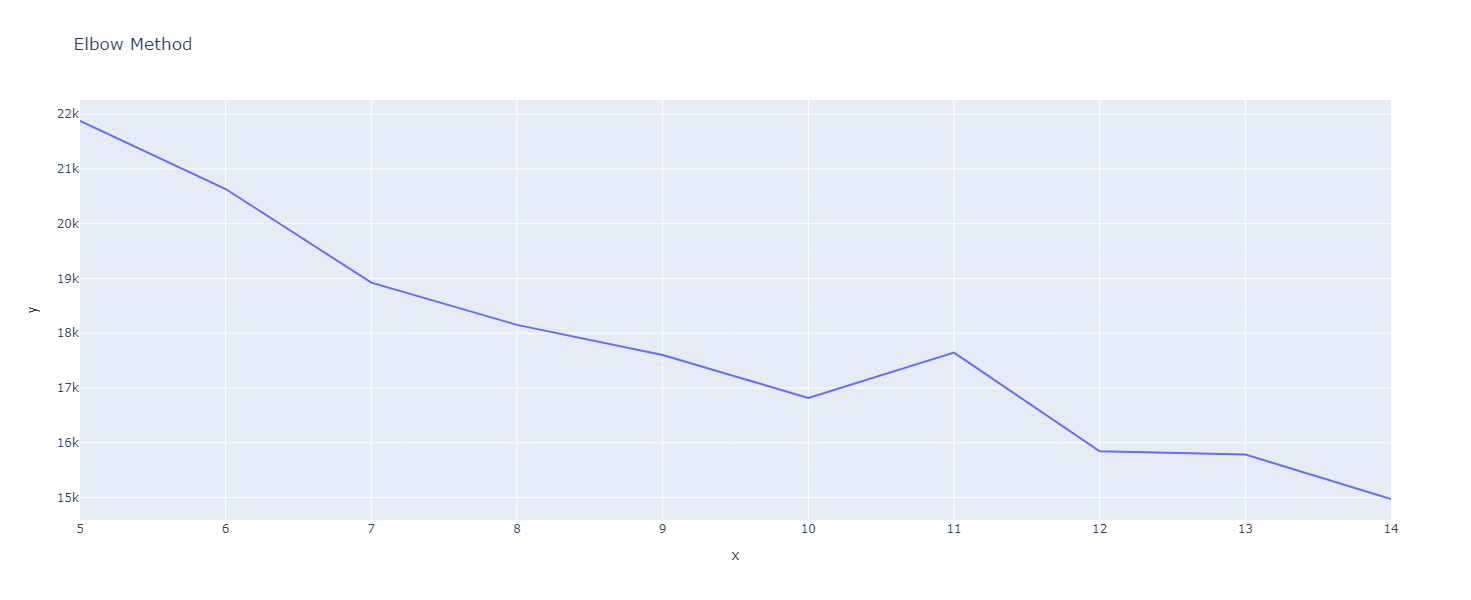

In [48]:
px.line(x=range(5,15), y=inertias, title= 'Elbow Method', height = 600, width=600)

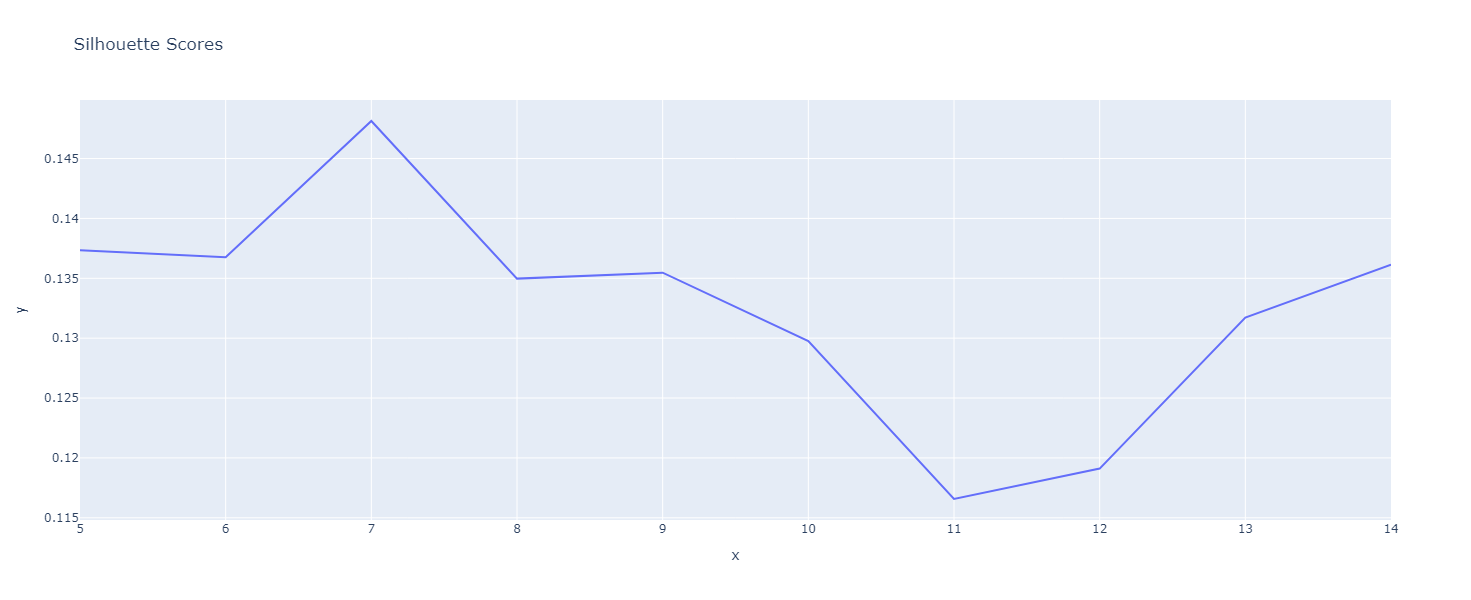

In [49]:
px.line(x=range(5,15), y=silhouettes, title= 'Silhouette Scores', height = 600, width=600)

In [52]:
kmeans = KMeans(n_clusters=10, n_init = 'auto')
scaled_data_with_columns['clusters'] = kmeans.fit_predict(scaled_data_with_columns)

In [53]:
scaled_data_with_columns

,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_2pt_conversions,fantasy_points,clusters
0,0.674945,0.009033,0.620552,0.958146,-0.827167,0.042597,0.280610,-0.538899,-0.370160,0.529425,0.205535,0.274212,-0.231529,0.941980,1
1,0.065392,-0.205645,0.144741,-0.665747,-0.827167,0.677458,0.980858,-0.538899,-0.370160,-0.108614,0.989062,0.750114,-0.231529,-0.126959,9
2,0.827333,0.545729,1.284184,1.770093,-0.827167,1.947179,1.681106,1.238121,2.283323,0.274209,1.857755,1.226016,-0.231529,1.452328,7
3,0.674945,0.331051,0.996193,0.958146,-0.827167,-0.592264,-0.419638,-0.538899,-0.370160,0.649527,1.397859,1.226016,-0.231529,1.982989,3
4,0.065392,0.116372,0.357604,0.958146,-0.827167,0.677458,0.018017,-0.538899,-0.370160,0.461868,-0.032930,0.274212,-0.231529,0.987683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,-2.677597,-1.601054,-2.847862,-1.477694,3.399596,0.042597,-0.332107,1.238121,-0.370160,0.236678,-1.395586,-2.819151,-0.231529,-3.016394,6
2634,-2.677597,-2.781785,-2.422136,-1.477694,-0.827167,-0.592264,-1.119886,-0.538899,-0.370160,-0.889275,-1.531851,-2.105298,-0.231529,-1.853511,6
2635,-0.239385,0.223711,-0.506370,-1.477694,-0.827167,-0.592264,-0.507169,-0.538899,-0.370160,0.574463,-0.424694,-0.201690,3.923399,-0.809963,0
2636,-0.848938,-0.312984,-1.082352,0.146200,-0.827167,0.677458,1.593575,-0.538899,-0.370160,0.829679,-1.276353,-0.915543,-0.231529,-0.383403,4


In [57]:
labeling = names.merge(scaled_data_with_columns, left_index=True, right_index=True)

In [61]:

# Horrible clustering approach as each player gets assigned to the different cluster
pd.set_option('display.max_rows', None)
labeling[['player_display_name', 'clusters']].drop_duplicates()

,player_display_name,clusters
0,Aaron Rodgers,1
1,Aaron Rodgers,9
2,Aaron Rodgers,7
3,Aaron Rodgers,3
8,Aaron Rodgers,2
13,Aaron Rodgers,4
17,Aaron Rodgers,0
40,Aaron Rodgers,8
56,Aaron Rodgers,6
252,Ben Roethlisberger,2
